In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats as sp


In [2]:
df = pd.read_csv("data/train/patient_999.psv",sep='|')
df.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77,1,NaN,NaN,-10.03,1,0
1,90.0,98.0,NaN,142.0,98.0,84.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,1,NaN,NaN,-10.03,2,0
2,95.0,99.0,36.5,146.0,106.0,94.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,1,NaN,NaN,-10.03,3,0
3,91.0,98.0,NaN,156.0,102.0,84.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,1,NaN,NaN,-10.03,4,0
4,104.0,98.0,NaN,150.0,112.0,106.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,1,NaN,NaN,-10.03,5,0
5,81.0,99.0,NaN,134.0,97.0,84.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,1,NaN,NaN,-10.03,6,0
6,74.0,99.0,36.4,126.0,84.0,74.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,1,NaN,NaN,-10.03,7,0
7,76.0,97.0,NaN,133.0,94.0,82.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,1,NaN,NaN,-10.03,8,0
8,98.0,99.0,NaN,130.0,97.0,90.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,1,NaN,NaN,-10.03,9,0
9,88.0,99.0,NaN,108.0,82.0,73.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,1,NaN,NaN,-10.03,10,0


In [3]:
df_list = []
for i in range(1,20000):
    df_temp = pd.read_csv("data/train/patient_"+str(i)+".psv",sep='|')
    df_list.append(df_temp)

In [4]:
count_nulls = {}
for df in df_list:
    subset_df = df.loc[:, df.isnull().all()]
    #print(subset_df)
    for column in subset_df.columns:
        if column not in count_nulls.keys():
            count_nulls[column] = 0
        count_nulls[column] += 1
    
    #break

In [5]:
count_nulls

{'EtCO2': 18432,
 'SaO2': 13481,
 'AST': 12930,
 'Alkalinephos': 13033,
 'Bilirubin_direct': 19000,
 'Bilirubin_total': 12959,
 'TroponinI': 16444,
 'Fibrinogen': 17768,
 'Unit1': 7686,
 'Unit2': 7686,
 'DBP': 3570,
 'BaseExcess': 13425,
 'pH': 10582,
 'PaCO2': 10870,
 'Calcium': 2680,
 'Lactate': 13799,
 'Phosphate': 6035,
 'FiO2': 11167,
 'HCO3': 10074,
 'Chloride': 9457,
 'PTT': 10069,
 'BUN': 1001,
 'Creatinine': 1019,
 'Glucose': 767,
 'Magnesium': 2469,
 'Potassium': 915,
 'Hct': 1155,
 'Hgb': 1222,
 'WBC': 1306,
 'Platelets': 1287,
 'SBP': 136,
 'Resp': 36,
 'MAP': 44,
 'Temp': 131,
 'O2Sat': 12,
 'HR': 3}

In [6]:
for key,val in count_nulls.items():
    if val >= 15000:
        print(key)

EtCO2
Bilirubin_direct
TroponinI
Fibrinogen


In [7]:
age = []
HR = []
temp = []
glucose = []
for df in df_list:
    subset_df = df.loc[:, df.isnull().all()]
    means = df.mean().dropna().to_dict()
    age.append(means['Age'])
    if "HR" in means.keys():
        HR.append(means["HR"])
    if "Temp" in means.keys():
        temp.append(means["Temp"])
    if "Glucose" in means.keys():
        glucose.append(means["Glucose"])
    

# distributions

In [14]:
def Plot(data,bins,param):
    plt.xlim([min(data)-5, max(data)+5])

    plt.hist(data, bins=bins, alpha=0.5)
    plt.title(param+'of patients distibution')
    plt.xlabel(param)
    plt.ylabel('count')

    plt.show()
    print("mean: ",st.mean(data))
    print("median: ",st.median(data))
    print("std: ",np.std(data))
    print("quantiles(0.05,0.95): ",np.quantile(data,0.05),np.quantile(data,0.95))

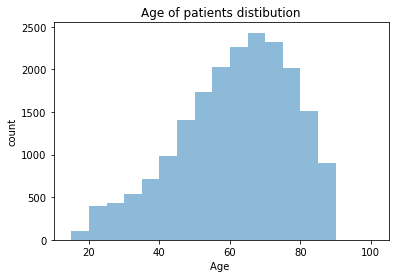

mean:  61.66733986699335
median:  63.309999999999995
std:  16.4856483486128
quantiles(0.05,0.95):  30.199 85.031


In [15]:
bins = np.arange(0, 100, 5)
Plot(age,bins,"Age ")


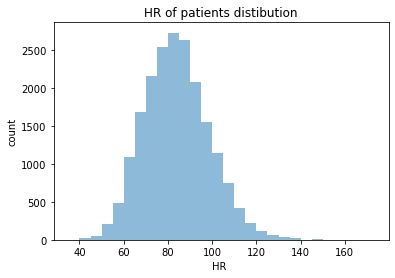

mean:  83.84313290483878
median:  83.13840996168582
std:  14.667380408036495
quantiles(0.05,0.95):  61.225367647058825 108.89391891891891


In [16]:
bins = np.arange(0, 200, 5)
Plot(HR,bins,"HR ")

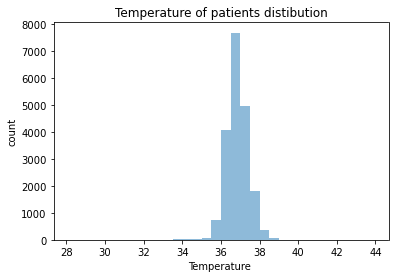

mean:  36.842616940319175
median:  36.8125
std:  0.5487273850405102
quantiles(0.05,0.95):  36.02222222222222 37.75136607142857


In [17]:
bins = np.arange(32, 42, 0.5)
Plot(temp,bins,"Temperature ")

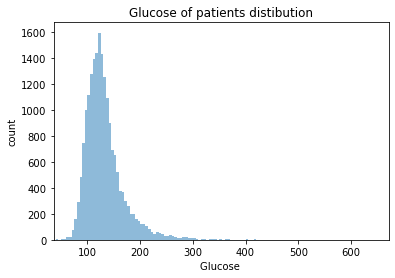

mean:  132.07726840449357
median:  124.77124183006535
std:  38.25499453361199
quantiles(0.05,0.95):  88.66666666666667 202.33333333333334


In [18]:
bins = np.arange(0, 600, 5)
Plot(glucose,bins,"Glucose ")

In [16]:
count = 0
age_s = []
age_ns = []
HR_s = []
HR_ns = []
temp_s = []
temp_ns = []
glucose_s = []
glucose_ns = []

for df in df_list:
    subset_df = df.loc[:, df.isnull().all()]
    means = df.mean().dropna().to_dict()
    if means['SepsisLabel'] > 0:
        age_s.append(means['Age'])
        if "HR" in means.keys():   
            HR_s.append(means["HR"])
        if "Temp" in means.keys():
            temp_s.append(means["Temp"])
        if "Glucose" in means.keys():
            glucose_s.append(means["Glucose"])
        count += 1
    else:
        age_ns.append(means['Age'])
        if "HR" in means.keys():   
            HR_ns.append(means["HR"])
        if "Temp" in means.keys():
            temp_ns.append(means["Temp"])
        if "Glucose" in means.keys():
            glucose_ns.append(means["Glucose"])
    
    

In [17]:
from scipy.stats import ttest_ind


In [18]:
def test(group1,group2):
    group1_mean = np.mean(group1)
    group2_mean = np.mean(group2)
    print("group1 mean value:",group1_mean)
    print("group2 mean value:",group2_mean)
    group1_std = np.std(group1)
    group2_std = np.std(group2)
    print("group1 std value:",group1_std)
    print("group2 std value:",group2_std)
    ttest,pval = ttest_ind(group1,group2)
    print("p-value",pval)
    if pval <0.05:
        print("we reject null hypothesis")
    else:
        print("we accept null hypothesis")

In [19]:
test(age_s,age_ns)

group1 mean value: 62.250939929328624
group2 mean value: 61.622904111063285
group1 std value: 16.568646520655417
group2 std value: 16.478464920713776
p-value 0.16716986461079134
we accept null hypothesis


In [20]:
test(HR_s,HR_ns)

group1 mean value: 89.38394582551848
group2 mean value: 83.42118304838533
group1 std value: 16.276034431664137
group2 std value: 14.450791374307018
p-value 1.9519407241221992e-49
we reject null hypothesis


In [21]:
test(temp_s,temp_ns)

group1 mean value: 37.03507106478457
group2 mean value: 36.82803881913627
group1 std value: 0.765401491811617
group2 std value: 0.5258470628571246
p-value 2.4083874519654614e-42
we reject null hypothesis


In [22]:
test(glucose_s,glucose_ns)

group1 mean value: 137.97647642627197
group2 mean value: 131.62871339405345
group1 std value: 41.592775847509365
group2 std value: 37.95171233847412
p-value 3.651507499504186e-09
we reject null hypothesis


In [23]:
for column in ['SBP','Platelets','Creatinine','Potassium','BUN']:
    group1 = []
    group2 = []
    for df in df_list:
        subset_df = df.loc[:, df.isnull().all()]
        means = df.mean().dropna().to_dict()
        if means['SepsisLabel'] > 0:
            if column in means.keys():
                group1.append(means[column])
        else:
            if column in means.keys():
                group2.append(means[column])
    test(group1,group2)

group1 mean value: 120.93758310207815
group2 mean value: 123.31749680648335
group1 std value: 18.178283588466552
group2 std value: 17.83520312776315
p-value 2.1204431721629763e-06
we reject null hypothesis
group1 mean value: 206.7794872196062
group2 mean value: 207.0676149079144
group1 std value: 114.22267644232075
group2 std value: 99.59149336862532
p-value 0.920660971341787
we accept null hypothesis
group1 mean value: 1.6666330202308266
group2 mean value: 1.4004900817716577
group1 std value: 1.771978884863295
group2 std value: 1.7363227198678506
p-value 8.245707845258435e-08
we reject null hypothesis
group1 mean value: 4.094631356681591
group2 mean value: 4.099252802767568
group1 std value: 0.538510145925817
group2 std value: 0.49686990219411575
p-value 0.7432000209277823
we accept null hypothesis
group1 mean value: 27.55510423096047
group2 mean value: 21.479065322627076
group1 std value: 20.80191570105059
group2 std value: 17.518540586514433
p-value 5.0590686079245524e-33
we reject 

In [5]:
cols = df_list[0].columns


In [ ]:
for col in cols:
    if col != 'SepsisLabel':
        Sespis = []
        Variable_list = []
        for df in df_list:
            subset_df = df.loc[:, df.isnull().all()]
            means = df.mean().dropna().to_dict()
            if col in means.keys():
                if means['SepsisLabel'] > 0:
                    Variable_list.append(means[col])
                    Sespis.append(1)
                else:
                    Variable_list.append(means[col])
                    Sespis.append(0)
    correlation, p_value = sp.pearsonr(Sespis, Variable_list)
    print(col, correlation)
    #break
                

HR 0.10424725050029793
O2Sat 0.006445501718007579
Temp 0.09652898833311088
SBP -0.03363615020042052
MAP -0.047219109320555154
DBP -0.04427710905300364
Resp 0.09347498080120523
EtCO2 -0.04324374933279058


In [14]:
for col in cols:
    for col2 in cols:
        if col != col2:
            Var1 = []
            Variable_list = []
            for df in df_list:
                subset_df = df.loc[:, df.isnull().all()]
                means = df.mean().dropna().to_dict()
                if col in means.keys() and col2 in means.keys():
                    Variable_list.append(means[col])
                    Var1.append(means[col2])
            correlation, p_value = sp.pearsonr(Var1, Variable_list)
            if correlation > 0.25 or correlation < -0.25:
                print(col,col2, correlation)

HR Temp 0.2644758603495614
HR Resp 0.2598810524942703
O2Sat Lactate -0.266292668775175
Temp HR 0.2644758603495614
Temp Unit1 -0.2553245765936638
Temp Unit2 0.2553245765936638
SBP MAP 0.7921415021981333
SBP DBP 0.5258534367106246
MAP SBP 0.7921415021981333
MAP DBP 0.8617531188971631
DBP SBP 0.5258534367106246
DBP MAP 0.8617531188971631
DBP Hct 0.31366723760993376
DBP Hgb 0.28456138946897036
DBP Age -0.3341424046566267
DBP Unit1 0.29029092266610546
DBP Unit2 -0.29029092266610546
Resp HR 0.2598810524942703
BaseExcess HCO3 0.8507599013623747
BaseExcess pH 0.6199732524044843
BaseExcess PaCO2 0.4722215577059156
BaseExcess Calcium 0.27536570313105974
BaseExcess Chloride -0.43036862462203146
BaseExcess Lactate -0.4208579268024802
HCO3 BaseExcess 0.8507599013623747
HCO3 pH 0.29459219488982685
HCO3 PaCO2 0.669811509034158
HCO3 Calcium 0.2528553184496349
HCO3 Chloride -0.44241994333984147
HCO3 Lactate -0.3187202241358718
pH BaseExcess 0.6199732524044843
pH HCO3 0.29459219488982685
pH PaCO2 -0.342

KeyboardInterrupt: 

In [8]:
cols1 = cols[12:]
cols1

Index(['PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride',
       'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium',
       'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb',
       'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1',
       'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [13]:
for i in range(len(cols1)):
    for j in range(i,len(cols1)):
        if cols1[i] != cols1[j]:
            Var1 = []
            Variable_list = []
            for df in df_list:
                subset_df = df.loc[:, df.isnull().all()]
                means = df.mean().dropna().to_dict()
                if cols1[i] in means.keys() and cols1[j] in means.keys():
                    Variable_list.append(means[cols1[i]])
                    Var1.append(means[cols1[j]])
            correlation, p_value = sp.pearsonr(Var1, Variable_list)
            if correlation > 0.25 or correlation < -0.25:
                print(cols1[i],cols1[j], correlation)

PaCO2 Chloride -0.354929690119719
AST Lactate 0.39059488994886343
BUN Creatinine 0.6157335432062218
BUN Phosphate 0.5467477666815274
BUN Potassium 0.31113729369413734
Alkalinephos Bilirubin_direct 0.29955391664891845
Calcium Hct 0.2529584662975739


KeyboardInterrupt: 

In [7]:
#print(cols)
cols1 = cols[18:]
cols1

Index(['Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate',
       'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI',
       'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender',
       'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [8]:
for i in range(len(cols1)):
    for j in range(i,len(cols1)):
        if cols1[i] != cols1[j]:
            Var1 = []
            Variable_list = []
            for df in df_list:
                subset_df = df.loc[:, df.isnull().all()]
                means = df.mean().dropna().to_dict()
                if cols1[i] in means.keys() and cols1[j] in means.keys():
                    Variable_list.append(means[cols1[i]])
                    Var1.append(means[cols1[j]])
            correlation, p_value = sp.pearsonr(Var1, Variable_list)
            if correlation > 0.25 or correlation < -0.25:
                print(cols1[i],cols1[j], correlation)

Creatinine Phosphate 0.5604349824231089
Creatinine Potassium 0.2826227254406417
Bilirubin_direct Bilirubin_total 0.9463783825555285
Lactate PTT 0.275859937898099
Phosphate Potassium 0.3922840031325441
Hct Hgb 0.9521671041967281
Fibrinogen Platelets 0.36297336989130713
Unit1 Unit2 -1.0
